In [8]:
#imports
from scipy.spatial import distance_matrix
from random import randrange
import copy
import matplotlib.pyplot as plt
import imageio
import imageio
import random
from time import time
from tqdm import tqdm

In [55]:
#loading datasets 
import numpy as np
kroa={}
krob={}
np_kroa=[]
np_krob=[]
with open('kroa100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        kroa[x[0]]=(x[1],x[2])
        np_kroa.append((x[1],x[2]))
np_kroa=np.array(np_kroa)
with open('krob100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        krob[x[0]]=(x[1],x[2])
        np_krob.append((x[1],x[2]))

np_kroa=np.array(np_kroa)
np_krob=np.array(np_krob)

#calculating distance matrix - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html
dista=distance_matrix(np_kroa,np_kroa)
distb=distance_matrix(np_krob,np_krob)

In [56]:
#plotting functions
def plotResult(np_dots, cycles):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.show()
    
def plotPartResult(np_dots, cycles,i):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.plot(np_dots[:,0], np_dots[:,1], ".")
    plt.savefig(f'plots/{i}.png')
    plt.show()    
def calcDistance(currentCycle, dist):
    distance = 0
    for x,y in zip(currentCycle, [*currentCycle[1:], currentCycle[0]]):
        distance += dist[x][y]
    return distance 

In [57]:
# 1st variable - Start cycle - with random assignments
def start_cycle_random(dataset_choice="kroa"):
    cycles={}
    cycles[0]=np.random.choice(100,50,replace=False)
    cycles[1]=np.array([i for i in np.arange(0,100,1) if i not in cycles[0]])
    np.random.shuffle(cycles[1])
    return cycles


In [58]:
# 3rd variable - Generate neighbour solution
#changes edges internally
def change_edges(cycles, edge1, edge2, internally=False): # dummy internally
    cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
#     print(cycles[cI])
    inA=np.where(cycles[cI] == edge1)[0][0]
    inB=np.where(cycles[cI] == edge2)[0][0]
    inA += 1
    inB += 1
    cycle = cycles[cI]
    cycle[inA: inB] = np.flip(cycle[inA: inB])
    return cycles

In [59]:
# 3rd variable - Generate neighbour solution
#changes vertex internally or externaly between cycles
def change_vertices(cycles, a, b, internally=True):
    if internally:
#         print(len(np.where(cycles[0] == a)))
#         print(np.where(cycles[0] == a))
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI][inB]=tmp
        #print(cycles[0][inB], cycles[0][inA])
    else:
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        cI2 = 1-cI
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI2] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI2][inB]=tmp
        #pass
    #print(cycles)
    return cycles
    #if aIndex in cycles[0]
    #raise NotImplementedError

In [60]:
# # 1st variable - Start cycle - with nearest neighbour method
# def start_cycle_heuristic(dataset_choice="kroa"):
#     results=[]
#     min_result=np.inf
#     max_result=0
#     if dataset_choice=="kroa":
#         dataset=np_kroa
#         dic=kroa
#         dist=copy.deepcopy(dista)
#         dist_stable=copy.deepcopy(dista)
#     else:
#         dataset=np_krob
#         dic=krob
#         dist=copy.deepcopy(distb)
#         dist_stable=copy.deepcopy(distb)


#     #zmiana dystansu przekątnej na nieskonczonosc
#     np.fill_diagonal(dist, np.inf)

#     cycles={}
#     cycles[0]=[randrange(200)]
#     cycles[1]=[(np.argsort(dist[cycles[0][0]])[-2])]

#     for b in range(2):
#         dist[:,int(cycles[b][0])]=np.inf

#     chosenCycle=1
#     for i in range(0,198):
#         chosenCycle = int((chosenCycle + 1)%2)
#         candidates=[]
#         for z,index in enumerate(cycles[chosenCycle]):
#             candidates.append((np.argmin(dist[index]),np.min(dist[index]),z))
#         candidates=np.array(candidates)
#         x=np.argmin(candidates[:,1])
#         cycles[chosenCycle]=np.insert(cycles[chosenCycle],int(candidates[x,2]),int(candidates[x,0]))
#         dist[:,int(candidates[x,0])]=np.inf
    
#     #print(f"cycle[0]: {calcDistance(cycles[0], dist_stable)}")
#     #print(f"cycle[1]: {calcDistance(cycles[1], dist_stable)}")
    
#     #SAVING RESULTS 
#     results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
#     if results[-1]>max_result:
#         max_result=results[-1]
#     if results[-1]<min_result:
#         min_result=results[-1]
# #         plt.clf()
# #         plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
# #         plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
# #         plt.plot(dataset[:,0][cycles[0]], dataset[:,1][cycles[0]], "->")
# #         plt.plot(dataset[:,0][cycles[1]], dataset[:,1][cycles[1]], "->")
# #         plt.savefig(f'best_NN_{dataset_choice}.png')
#     return cycles

In [61]:
# 2nd variable - Find more optimal solution
# switch parameter defines how u find neighbour solutions (is it change_vertices or change_edges func)
def greedy_search(dist, np_dots, init_random = False, switch="change_edges"):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
        
    #print(cycles)
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    else:
        print(f"Unknow mode {switch}. Select change_vertices or change_edges")
        return
    
    
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    #print(f"Initial distance: {bestDistance}")
    
    #plotPartResult(np_dots, cycles)
    
    
    done = False
    while not done:
        done = True
        #-------------calculating possible moves
        possible_moves = []
        
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["external", x])

        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["internal", x])
        
        possible_moves = np.array(possible_moves)
        i = np.random.choice(range(len(possible_moves)),len(possible_moves),replace=False)
        possible_moves = possible_moves[i]
        

        for move, edges in possible_moves:
#             print(move, edges)
            cyclesCopy = copy.deepcopy(cycles)
            edge1 = edges[0]
            edge2 = edges[1]
            
#             print(edge1, edge2)
            if move == "internal":
                cyclesCopy = internal_change(cyclesCopy, edge1, edge2, internally=True)
            else:
                cyclesCopy = change_vertices(cyclesCopy, edge1, edge2, False)
#             plotPartResult(np_dots, cycles)
            currentDistance = 0
            currentDistance += calcDistance(cyclesCopy[0], dist)
            currentDistance += calcDistance(cyclesCopy[1], dist)
            if currentDistance < bestDistance:
                #print(f"New best distance: {currentDistance}, changed {edge1} with {edge2} on {move}")
                cycles = cyclesCopy
                bestDistance = currentDistance
                done = False
                break
    
#     plotPartResult(np_dots, cycles)
#     plt.show()
    return cycles, bestDistance
    

In [68]:
K = 3 # docelowo 10
N = 10 # docelowo 100







  0%|          | 0/10 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray






 10%|█         | 1/10 [00:12<01:56, 12.89s/it]





 20%|██        | 2/10 [00:25<01:41, 12.68s/it]





 30%|███       | 3/10 [00:41<01:36, 13.73s/it]





 40%|████      | 4/10 [00:53<01:19, 13.23s/it]





 50%|█████     | 5/10 [01:06<01:06, 13.26s/it]





 60%|██████    | 6/10 [01:17<00:50, 12.63s/it]





 70%|███████   | 7/10 [01:30<00:37, 12.55s/it]





 80%|████████  | 8/10 [01:43<00:25, 12.81s/it]





 90%|█████████ | 9/10 [01:55<00:12, 12.62s/it]





100%|██████████| 10/10 [02:07<00:00, 12.78s/it]






  0%|          | 0/10 [00:00<?, ?it/s]





 10%|█         | 1/10 [00:16<02:25, 16.16s/it]





greedy_search- time_mean:133.01845407485962,  time_min:127.75986909866333, time_max:143.41325783729553, min:25660.556826582153, max:26598.22315963106, mean:26199.155921629415


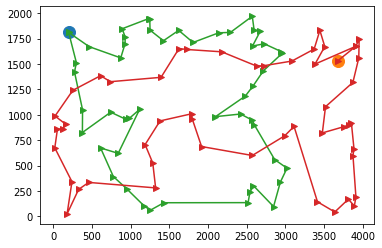







  0%|          | 0/10 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray






 10%|█         | 1/10 [00:11<01:40, 11.12s/it]





 20%|██        | 2/10 [00:22<01:29, 11.22s/it]





 30%|███       | 3/10 [00:34<01:20, 11.46s/it]





 40%|████      | 4/10 [00:48<01:12, 12.15s/it]





 50%|█████     | 5/10 [01:02<01:04, 12.89s/it]





 60%|██████    | 6/10 [01:18<00:54, 13.60s/it]





 70%|███████   | 7/10 [01:29<00:38, 12.93s/it]





 80%|████████  | 8/10 [01:41<00:25, 12.53s/it]





 90%|█████████ | 9/10 [01:51<00:11, 11.96s/it]





100%|██████████| 10/10 [02:03<00:00, 12.35s/it]






  0%|          | 0/10 [00:00<?, ?it/s]





 10%|█         | 1/10 [00:13<01:58, 13.12s/it]





greedy_search- time_mean:124.02873373031616,  time_min:115.29235339164734, time_max:133.3088219165802, min:26397.0621789, max:27183.448689635024, mean:26878.600490049157


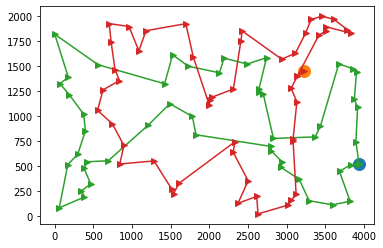

<Figure size 432x288 with 0 Axes>

In [69]:
#MAIN - tu poskladac wyzej zaimplementowane funkcje w 8 roznych kombinacji algorytmow i sprawdzic ich czasy i wyplotowac skutecznosci


for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
    
    timeTable = []
    cyclesTable = []
    distanceTable = []
    for _ in range(K):
        
        distanceTableBuffer = []
        cyclesTableBuffer = []
        bestDistance = 0
        startTime = time()
        for _ in tqdm(range(N)):

            cycles, bestDistance = greedy_search(dist, dataset, init_random = True, switch="change_edges")
            distanceTableBuffer.append(bestDistance)
            cyclesTableBuffer.append(cycles)
        timeTable.append(time() - startTime)
        distanceTable.append(np.min(distanceTableBuffer))
        cyclesTable.append( cyclesTableBuffer[np.argmin(distanceTableBuffer) ] )
    
    print(f"greedy_search- time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    cycles = cyclesTable[np.argmin(distanceTable)]
    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")
    plt.show()
    
    plt.savefig(f'greedy_search_best_NN_randomTrue_changeEdges_{dataset_choice}.png')


In [ ]:
#greedy_search- time_mean:133.01845407485962,  time_min:127.75986909866333, time_max:143.41325783729553, 
# min:25660.556826582153, max:26598.22315963106, mean:26199.155921629415

#greedy_search- time_mean:124.02873373031616,  time_min:115.29235339164734, time_max:133.3088219165802, 
# min:26397.0621789, max:27183.448689635024, mean:26878.600490049157

##  (ILS1) Iterated local search - Iteracyjne przeszukiwanie lokalne z niewielką perturbacją,

In [82]:
# 2nd variable - Find more optimal solution
# switch parameter defines how u find neighbour solutions (is it change_vertices or change_edges func)
def ILS1(dist, np_dots, init_random = True, switch="change_edges", durationSec=10, shakeIt=3):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
        
    #print(cycles)
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    else:
        print(f"Unknow mode {switch}. Select change_vertices or change_edges")
        return
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    #print(f"Initial distance: {bestDistance}")
    
    #plotPartResult(np_dots, cycles)
    
    
    startTime = time()
    bestBestDist = np.inf
    while True:
        #-------------calculating possible moves
        possible_moves = []
        
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["external", x])

        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["internal", x])
        
        possible_moves = np.array(possible_moves)
        i = np.random.choice(range(len(possible_moves)),len(possible_moves),replace=False)
        possible_moves = possible_moves[i]
        
        bestPossible = True
        for move, edges in possible_moves:
#             print(move, edges)
            cyclesCopy = copy.deepcopy(cycles)
            edge1 = edges[0]
            edge2 = edges[1]
            
#             print(edge1, edge2)
            if move == "internal":
                cyclesCopy = internal_change(cyclesCopy, edge1, edge2, internally=True)
            else:
                cyclesCopy = change_vertices(cyclesCopy, edge1, edge2, False)
#             plotPartResult(np_dots, cycles)
            currentDistance = 0
            currentDistance += calcDistance(cyclesCopy[0], dist)
            currentDistance += calcDistance(cyclesCopy[1], dist)
            if currentDistance < bestDistance:
#                 print(f"New best distance: {currentDistance}, changed {edge1} with {edge2} on {move}")
                cycles = cyclesCopy
                bestDistance = currentDistance
                bestPossible = False
                break
        
        if not bestPossible:
            continue
        
        
        
#         plotResult(np_dots, cycles)
        
        
        
        if bestDistance < bestBestDist:
            bestBestDist = bestDistance
            bestCycles = copy.deepcopy(cycles)
            print(f"BestDist: {bestDistance} is better than previous, so remember cycles")
        else:
            cycles = copy.deepcopy(bestCycles)
            print(f"BestDist: {bestDistance} is worst than previous so swap cycles")
        
        # Shake it
        
        for _ in range(shakeIt):
            possible_moves = []

            mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
            combinations = mesh.T.reshape(-1, 2)
            for x in combinations:
                possible_moves.append(["external", x])

            mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
            mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
            combinations = mesh.T.reshape(-1, 2)
            for x in combinations:
                possible_moves.append(["internal", x])

            possible_moves = np.array(possible_moves)
            i = np.random.choice(range(len(possible_moves)),1,replace=False)
            possible_moves = possible_moves[i]
            
            for move, edges in possible_moves:
                edge1 = edges[0]
                edge2 = edges[1]

#                 print(edge1, edge2)
                if move == "internal":
                    cycles = internal_change(cycles, edge1, edge2, internally=True)
                else:
                    cycles = change_vertices(cycles, edge1, edge2, False)
    
#         plotResult(np_dots, cycles)
        bestDistance = 0
        bestDistance += calcDistance(cycles[0], dist)
        bestDistance += calcDistance(cycles[1], dist)
    
#     plotPartResult(np_dots, cycles)
#     plt.show()
    return cycles, bestDistance












  0%|          | 0/3 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


BestDist: 27806.554738226878 is better than previous, so remember cycles


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


BestDist: 27668.117410449802 is better than previous, so remember cycles
BestDist: 26881.348056962473 is better than previous, so remember cycles
BestDist: 26929.16430072095 is worst than previous so swap cycles
BestDist: 26920.343032191206 is worst than previous so swap cycles
BestDist: 28267.512728083828 is worst than previous so swap cycles
BestDist: 26601.79426753993 is better than previous, so remember cycles
BestDist: 26591.964425647297 is better than previous, so remember cycles
BestDist: 27169.704517078306 is worst than previous so swap cycles
BestDist: 27771.727550798198 is worst than previous so swap cycles
BestDist: 26305.00217679843 is better than previous, so remember cycles
BestDist: 26371.65029812062 is worst than previous so swap cycles
BestDist: 26759.173439554266 is worst than previous so swap cycles
BestDist: 25039.494553051067 is better than previous, so remember cycles
BestDist: 25209.468481399137 is worst than previous so swap cycles
BestDist: 27646.092284695278 i












 33%|███▎      | 1/3 [02:22<04:45, 142.74s/it]

BestDist: 26794.047076584837 is better than previous, so remember cycles
BestDist: 25527.16699234225 is better than previous, so remember cycles
BestDist: 25430.641778374513 is better than previous, so remember cycles
BestDist: 25018.841130745153 is better than previous, so remember cycles
BestDist: 26435.95829253865 is worst than previous so swap cycles
BestDist: 25401.956940075244 is worst than previous so swap cycles
BestDist: 26074.627150085682 is worst than previous so swap cycles
BestDist: 25018.841130745153 is worst than previous so swap cycles
BestDist: 25018.841130745157 is worst than previous so swap cycles
BestDist: 25018.841130745153 is worst than previous so swap cycles
BestDist: 25538.482112313475 is worst than previous so swap cycles
BestDist: 25018.841130745153 is worst than previous so swap cycles
BestDist: 25354.417822784915 is worst than previous so swap cycles
BestDist: 25018.841130745153 is worst than previous so swap cycles
BestDist: 25022.28543454362 is worst tha












 67%|██████▋   | 2/3 [04:44<02:22, 142.30s/it]

BestDist: 27644.6685074123 is better than previous, so remember cycles
BestDist: 26734.640571405347 is better than previous, so remember cycles
BestDist: 27060.526720574482 is worst than previous so swap cycles
BestDist: 26443.33494579392 is better than previous, so remember cycles
BestDist: 26323.02187668248 is better than previous, so remember cycles
BestDist: 26167.215924580974 is better than previous, so remember cycles
BestDist: 26167.215924580974 is worst than previous so swap cycles
BestDist: 26822.950543794475 is worst than previous so swap cycles
BestDist: 26741.11289350173 is worst than previous so swap cycles
BestDist: 26035.712666921572 is better than previous, so remember cycles
BestDist: 26278.835060776175 is worst than previous so swap cycles
BestDist: 27850.633756797826 is worst than previous so swap cycles
BestDist: 25526.838840391465 is better than previous, so remember cycles
BestDist: 25566.650009839897 is worst than previous so swap cycles
BestDist: 26072.748880054












100%|██████████| 3/3 [07:06<00:00, 142.26s/it]


greedy_search- min:25055.00475670467, max:26441.723936647555, mean:25961.823080689905


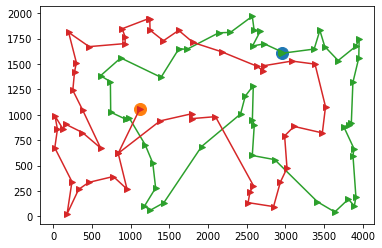












  0%|          | 0/3 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


BestDist: 29018.832460678583 is better than previous, so remember cycles


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


BestDist: 29018.832460678583 is worst than previous so swap cycles
BestDist: 27103.5849756218 is better than previous, so remember cycles
BestDist: 27103.5849756218 is worst than previous so swap cycles
BestDist: 27120.582441931525 is worst than previous so swap cycles
BestDist: 27296.827954699707 is worst than previous so swap cycles
BestDist: 26765.297712437907 is better than previous, so remember cycles
BestDist: 27360.153695560926 is worst than previous so swap cycles
BestDist: 26104.910894889592 is better than previous, so remember cycles
BestDist: 26877.441550152063 is worst than previous so swap cycles
BestDist: 26104.910894889592 is worst than previous so swap cycles
BestDist: 26793.674328704372 is worst than previous so swap cycles
BestDist: 27123.966694049617 is worst than previous so swap cycles
BestDist: 26892.71805103449 is worst than previous so swap cycles
BestDist: 26071.780915251227 is better than previous, so remember cycles
BestDist: 26071.780915251227 is worst than 












 33%|███▎      | 1/3 [02:20<04:40, 140.48s/it]

BestDist: 30696.49935766116 is better than previous, so remember cycles
BestDist: 27451.57838124095 is better than previous, so remember cycles
BestDist: 27891.38097427552 is worst than previous so swap cycles
BestDist: 27310.71287519273 is better than previous, so remember cycles
BestDist: 27529.738039860127 is worst than previous so swap cycles
BestDist: 26971.533948135446 is better than previous, so remember cycles
BestDist: 27399.202745803537 is worst than previous so swap cycles
BestDist: 26971.533948135446 is worst than previous so swap cycles
BestDist: 27603.50272457166 is worst than previous so swap cycles
BestDist: 27028.57307053663 is worst than previous so swap cycles
BestDist: 27386.322834159713 is worst than previous so swap cycles
BestDist: 27889.063419802216 is worst than previous so swap cycles
BestDist: 27204.76392000004 is worst than previous so swap cycles
BestDist: 26630.170718692876 is better than previous, so remember cycles
BestDist: 26592.893202868865 is better 












 67%|██████▋   | 2/3 [04:45<02:21, 141.91s/it]

BestDist: 27622.2359059205 is better than previous, so remember cycles
BestDist: 28678.983720689364 is worst than previous so swap cycles
BestDist: 26157.062169769517 is better than previous, so remember cycles
BestDist: 26157.062169769517 is worst than previous so swap cycles
BestDist: 27054.18554611681 is worst than previous so swap cycles
BestDist: 27527.95430697416 is worst than previous so swap cycles
BestDist: 26583.687434174597 is worst than previous so swap cycles
BestDist: 27201.741289924812 is worst than previous so swap cycles
BestDist: 26686.577177845178 is worst than previous so swap cycles
BestDist: 26157.062169769517 is worst than previous so swap cycles
BestDist: 25430.133655687063 is better than previous, so remember cycles
BestDist: 25411.44482364358 is better than previous, so remember cycles
BestDist: 25411.44482364358 is worst than previous so swap cycles
BestDist: 25411.44482364358 is worst than previous so swap cycles
BestDist: 25991.636566759607 is worst than pr












100%|██████████| 3/3 [07:06<00:00, 142.27s/it]


greedy_search- min:25673.736205813417, max:26905.560222127307, mean:26084.800033947653


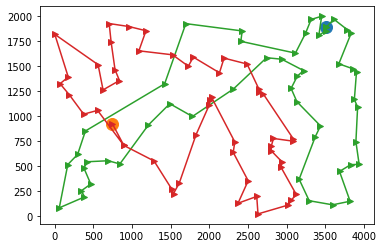

In [83]:
K = 3 # docelowo 10
durationSec = 140
for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
    
    cyclesTable = []
    distanceTable = []
    for _ in tqdm(range(K)):
        cycles, bestDistance = ILS1(dist, dataset, init_random = True, switch="change_edges", durationSec=durationSec, shakeIt=3)
        distanceTable.append(bestDistance)
        cyclesTable.append(cycles )
    
    print(f"greedy_search- min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    cycles = cyclesTable[np.argmin(distanceTable)]
    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")
    plt.show()
    
    #plt.savefig(f'greedy_search_best_NN_randomTrue_changeEdges_{dataset_choice}.png')


## (ILS2) Iterated local search - Iteracyjne przeszukiwanie lokalne z Large-scale neighborhood search, tj. większą perturbacją typu Destroy-Repair.